### Alignment between generated and train sequences in likely-wood-857 and 2pwz MDH sequences

- Compute global alignment between (1) selected generated sequences, (2) beta sampled generated sequences, (3) all generated sequences, (4) all training sequences, with the protein sequences of 2pwz, the malate dehydrogenase (MDH) protein of E. coli. 
- Plot the distribution of different sets of global alignment scores against each other. 

In [1]:
from biosynseq import metrics
from biosynseq import visualize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from typing import List, Dict
from Bio.SeqRecord import SeqRecord 
from Bio import SeqIO

In [2]:
%config InlineBackend.figure_format='retina'
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,6]
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams.update({'font.size':14})

In [3]:
# get the indices of the selected sequences
excel_path = Path("/homes/lind/MDH-pipeline/visualize/MDH.selected.GB.xlsx")
df = pd.read_excel(excel_path)
indices = df["Index"].to_numpy()
print(indices)
print(type(indices))
print(len(indices))

[ 313  558  697  597  368  862  152  123  979  835  867 1002  337  760
  576  970  341  709  183  220  474  311  889  137  866  527  795  301
  498   85  996  816  322  896  250   49  646  995  134  355  329  249
   39   63  353  463  145   58  699  611  766  723  965  647   79  448
  180  834  998  480  428  715  459  343  803  781  223  162  452  556
  695  667  548  333   76  263  529 1011  719  796  339  753  837  550
  606  810  789  509  638  268  427  573  934  843  948  730  436  786]
<class 'numpy.ndarray'>
98


In [4]:
# get the protein sequences of the generated sequences

# first load all the original generated sequences
gen_fasta_path = Path("/homes/mzvyagin/mdh_gpt2/likely-wood-857/likely-wood-857_1024concat_seqs.fasta")
dna_seqs = metrics.get_seqs_from_fasta(fasta_path=gen_fasta_path)
gen_protein_seqs = metrics.dna_to_protein_seqs(dna_seqs=dna_seqs)

In [5]:
# then save the selected nucleotide sequences
selected_gen_dna_seqs = []
for i in indices:
    selected_gen_dna_seqs.append(dna_seqs[i])
print(len(selected_gen_dna_seqs))

98


In [6]:
# save the selected nucleotide sequences to a FASAT file
selected_gen_fasta_path = Path("/homes/lind/MDH-pipeline/visualize/selected_gen_seqs_likely-wood-857.fasta")
SeqIO.write(selected_gen_dna_seqs, selected_gen_fasta_path, "fasta")

98

In [7]:
# translate the selected nucleotide sequences to protein sequences
selected_gen_protein_seqs = metrics.dna_to_protein_seqs(dna_seqs=selected_gen_dna_seqs)

In [8]:
# get the 2pwz sequence
ecoli_2pwz_fasta_path = Path("/homes/lind/MDH-pipeline/visualize/2pwz.fasta")
protein_seq_2pwz = metrics.get_seqs_from_fasta(fasta_path=ecoli_2pwz_fasta_path)
print(protein_seq_2pwz)
print(type(protein_seq_2pwz))
print(type(protein_seq_2pwz[0]))
print((protein_seq_2pwz[0].seq))

[SeqRecord(seq=Seq('MKVAVLGAAGGIGQALALLLKTQLPSGSELSLYDIAPVTPGVAVDLSHIPTAVK...VNK'), id='2PWZ_1|Chains', name='2PWZ_1|Chains', description='2PWZ_1|Chains A, B[auth C], C[auth E], D[auth G]|Malate dehydrogenase|Escherichia coli (83333)', dbxrefs=[])]
<class 'list'>
<class 'Bio.SeqRecord.SeqRecord'>
MKVAVLGAAGGIGQALALLLKTQLPSGSELSLYDIAPVTPGVAVDLSHIPTAVKIKGFSGEDATPALEGADVVLISAGVARKPGMDRSDLFNVNAGIVKNLVQQVAKTCPKACIGIITNPVNTTVAIAAEVLKKAGVYDKNKLFGVTTLDIIRSNTFVAELKGKQPGEVEVPVIGGHSGVTILPLLSQVPGVSFTEQEVADLTKRIQNAGTEVVEAKAGGGSATLSMGQAAARFGLSLVRALQGEQGVVECAYVEGDGQYARFFSQPLLLGKNGVEERKSIGTLSAFEQNALEGMLDTLKKDIALGEEFVNK


### Global alignment between selected sequences and 2pwz sequence

In [9]:
# compute global aligmment between selected sequences and 2pwz sequence
alignment_type = "global"
num_workers = 70
match_score = 1.0
mismatch_score = 0.0
open_gap_score = 0.0
extend_gap_score = 0.0

selected_gen_2pwz_align_scores_matrix = metrics.alignment_scores_parallel(
    seqs1_rec=selected_gen_protein_seqs,
    seqs2_rec=protein_seq_2pwz,
    alignment_type=alignment_type,
    num_workers=num_workers,
    match_score=match_score,
    mismatch_score=mismatch_score,
    open_gap_score=open_gap_score,
    extend_gap_score=extend_gap_score,
)

98it [00:00, 24485.72it/s]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


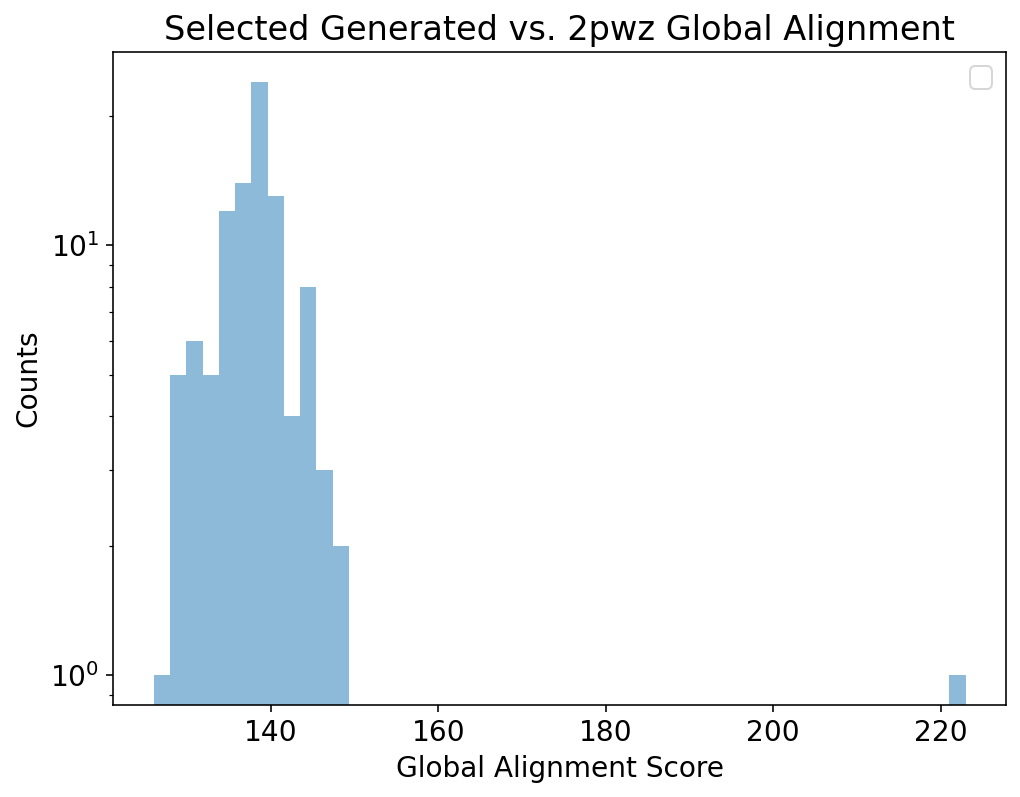

In [10]:
# plot a histogram showing the distributions of alignment scores 
plt.hist(selected_gen_2pwz_align_scores_matrix, bins=50, alpha=0.5, log=True)
plt.xlabel("Global Alignment Score")
plt.ylabel("Counts")
plt.title("Selected Generated vs. 2pwz Global Alignment")
plt.legend()

### Global alignment between beta sampled generated sequences and 2pwz

In [11]:
beta_gen_fasta_path = Path("/homes/abrace/src/SyntheticSequenceEvaluation/Examples/GMM-alpha-10-beta-16-seed-50-filtered.fasta")
dna_seqs = metrics.get_seqs_from_fasta(fasta_path=beta_gen_fasta_path)
beta_gen_protein_seqs = metrics.dna_to_protein_seqs(dna_seqs=dna_seqs)

In [12]:
# compute global aligmment between beta sampled generated sequences and 2pwz sequence
alignment_type = "global"
num_workers = 70
match_score = 1.0
mismatch_score = 0.0
open_gap_score = 0.0
extend_gap_score = 0.0

beta_gen_2pwz_align_scores_matrix = metrics.alignment_scores_parallel(
    seqs1_rec=beta_gen_protein_seqs,
    seqs2_rec=protein_seq_2pwz,
    alignment_type=alignment_type,
    num_workers=num_workers,
    match_score=match_score,
    mismatch_score=mismatch_score,
    open_gap_score=open_gap_score,
    extend_gap_score=extend_gap_score,
)

90it [00:00, 13105.38it/s]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


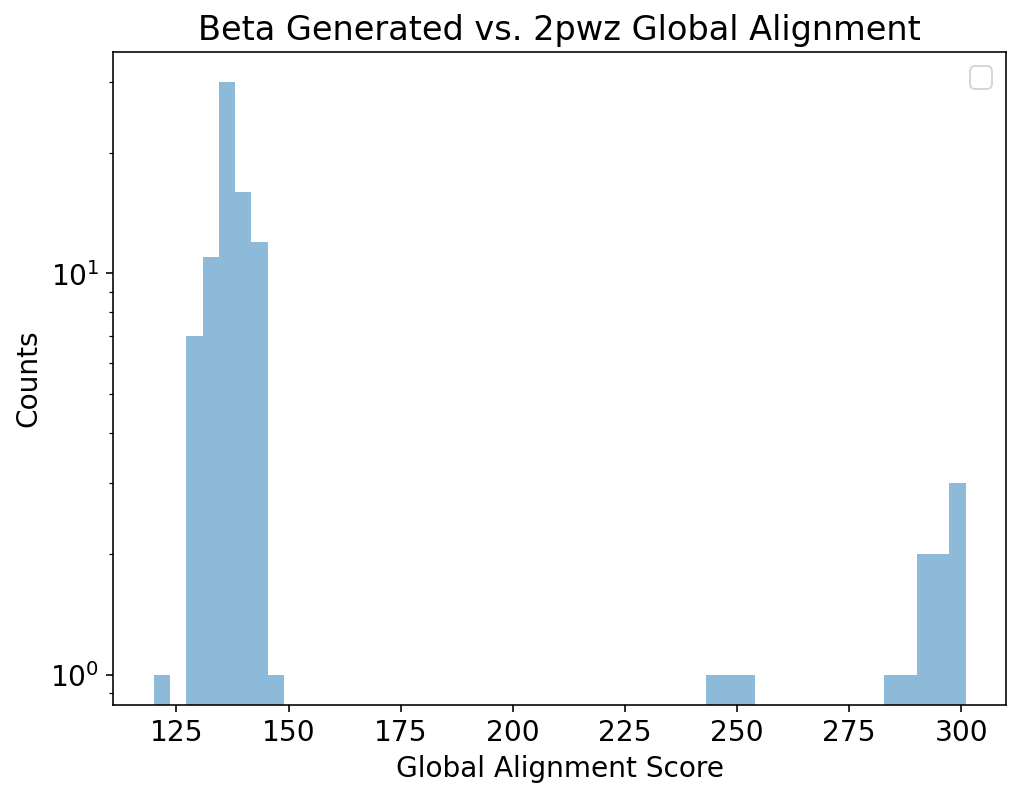

In [13]:
# plot a histogram showing the distributions of alignment scores 
plt.hist(beta_gen_2pwz_align_scores_matrix, bins=50, alpha=0.5, log=True)
plt.xlabel("Global Alignment Score")
plt.ylabel("Counts")
plt.title("Beta Generated vs. 2pwz Global Alignment")
plt.legend()

### Global alignment between all generated sequences and 2pwz

In [14]:
# compute global aligmment between all generated sequences and 2pwz sequence
alignment_type = "global"
num_workers = 70
match_score = 1.0
mismatch_score = 0.0
open_gap_score = 0.0
extend_gap_score = 0.0

all_gen_2pwz_align_scores_matrix = metrics.alignment_scores_parallel(
    seqs1_rec=gen_protein_seqs,
    seqs2_rec=protein_seq_2pwz,
    alignment_type=alignment_type,
    num_workers=num_workers,
    match_score=match_score,
    mismatch_score=mismatch_score,
    open_gap_score=open_gap_score,
    extend_gap_score=extend_gap_score,
)

1024it [00:00, 110458.74it/s]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


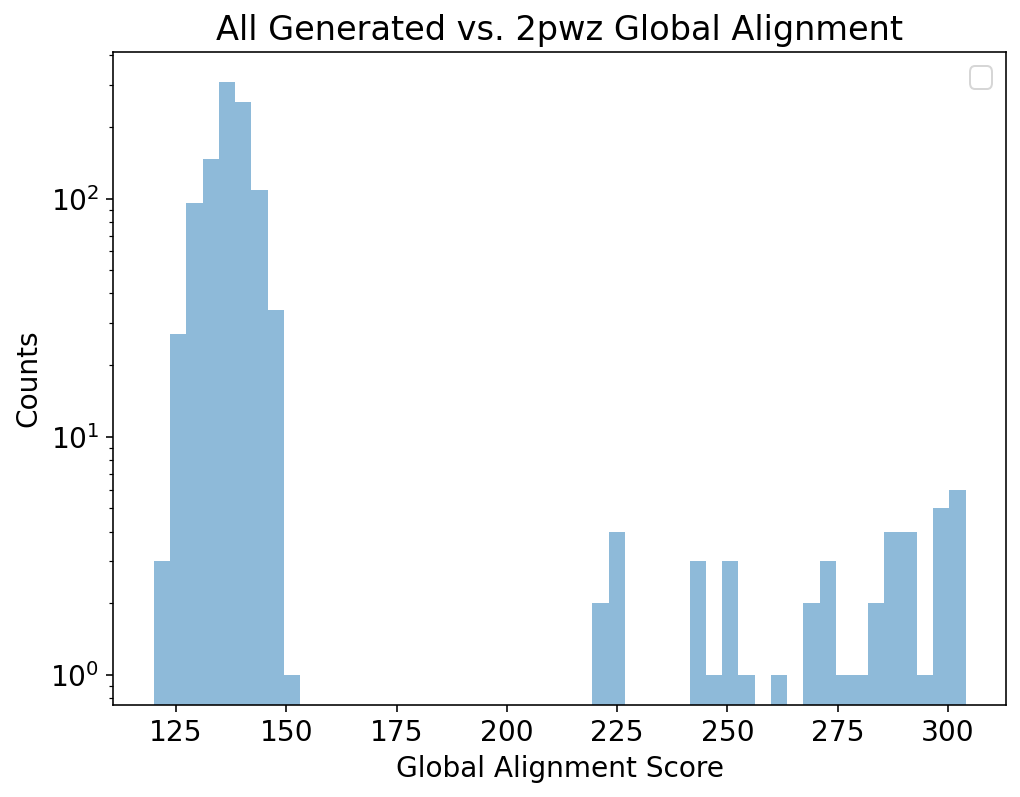

In [15]:
plt.hist(all_gen_2pwz_align_scores_matrix, bins=50, alpha=0.5, log=True)
plt.xlabel("Global Alignment Score")
plt.ylabel("Counts")
plt.title("All Generated vs. 2pwz Global Alignment")
plt.legend()

### Global alignment between all train sequences and 2pwz

In [16]:
train_fasta_path = Path("/homes/mzvyagin/mdh_gpt2/train_folder_concatenated.fasta")
dna_seqs = metrics.get_seqs_from_fasta(fasta_path=train_fasta_path)
train_protein_seqs = metrics.dna_to_protein_seqs(dna_seqs=dna_seqs)

/homes/lind/.conda/envs/mdhpipeline/lib/python3.9/site-packages/Bio/Seq.py:2979: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [17]:
print(len(dna_seqs))

29304


#### Compute global alignment between 1000 randomly selected train sequences and 2pwz

In [18]:
def rand_select(start, end, num) -> List[int]:
    # start: value to start at
    # end: value to end at 
    # num: how many values to get from within the range of start and end
    res = []
    while len(res) < num:
        res.append(np.random.randint(start, end))
        res = list(set(res)) # remove duplicates
    
    return res

In [19]:
rand_inds = rand_select(0, 29304, 1000)

In [20]:
selected_train_dna_seqs = []
for i in rand_inds:
    selected_train_dna_seqs.append(dna_seqs[i])
print(len(selected_train_dna_seqs))

1000


In [21]:
selected_train_fasta_path = Path("/homes/lind/MDH-pipeline/visualize/selected_train_seqs_likely-wood-857.fasta")
SeqIO.write(selected_train_dna_seqs, selected_train_fasta_path, "fasta")

1000

In [22]:
selected_train_protein_seqs = metrics.dna_to_protein_seqs(dna_seqs=selected_train_dna_seqs)

In [23]:
# compute global aligmment between randomly selected train sequences and 2pwz sequence
alignment_type = "global"
num_workers = 70
match_score = 1.0
mismatch_score = 0.0
open_gap_score = 0.0
extend_gap_score = 0.0

selected_train_2pwz_align_scores_matrix = metrics.alignment_scores_parallel(
    seqs1_rec=selected_train_protein_seqs,
    seqs2_rec=protein_seq_2pwz,
    alignment_type=alignment_type,
    num_workers=num_workers,
    match_score=match_score,
    mismatch_score=mismatch_score,
    open_gap_score=open_gap_score,
    extend_gap_score=extend_gap_score,
)

1000it [00:00, 112883.63it/s]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


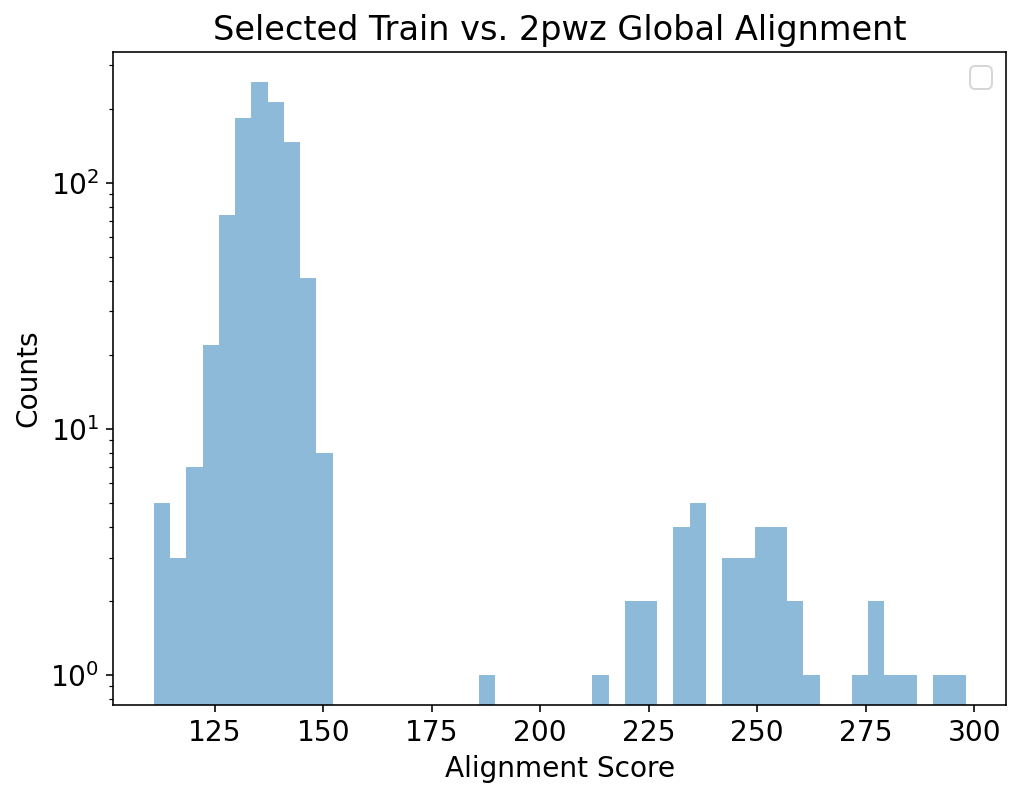

In [24]:
# plot a histogram showing the distributions of alignment scores 
plt.hist(selected_train_2pwz_align_scores_matrix, bins=50, alpha=0.5, log=True)
plt.xlabel("Alignment Score")
plt.ylabel("Counts")
plt.title("Selected Train vs. 2pwz Global Alignment")
plt.legend()

#### Compute global alignment between all train sequences and 2pwz

In [25]:
# remove train protein seqs with 0 length 
# to avoid issue with global alignment
new_train_protein_seqs = []
count = 0
for i in range(len(train_protein_seqs)):
    if len(train_protein_seqs[i].seq) != 0:
        new_train_protein_seqs.append(train_protein_seqs[i])
        count += 1

In [26]:
print(count)

29303


In [27]:
# compute global alignment between all train sequences and 2pwz
alignment_type = "global"
num_workers = 70
match_score = 1.0
mismatch_score = 0.0
open_gap_score = 0.0
extend_gap_score = 0.0

all_train_2pwz_align_scores_matrix = metrics.alignment_scores_parallel(
    seqs1_rec=new_train_protein_seqs,
    seqs2_rec=protein_seq_2pwz,
    alignment_type=alignment_type,
    num_workers=num_workers,
    match_score=match_score,
    mismatch_score=mismatch_score,
    open_gap_score=open_gap_score,
    extend_gap_score=extend_gap_score,
)

29303it [00:00, 54917.28it/s] 


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


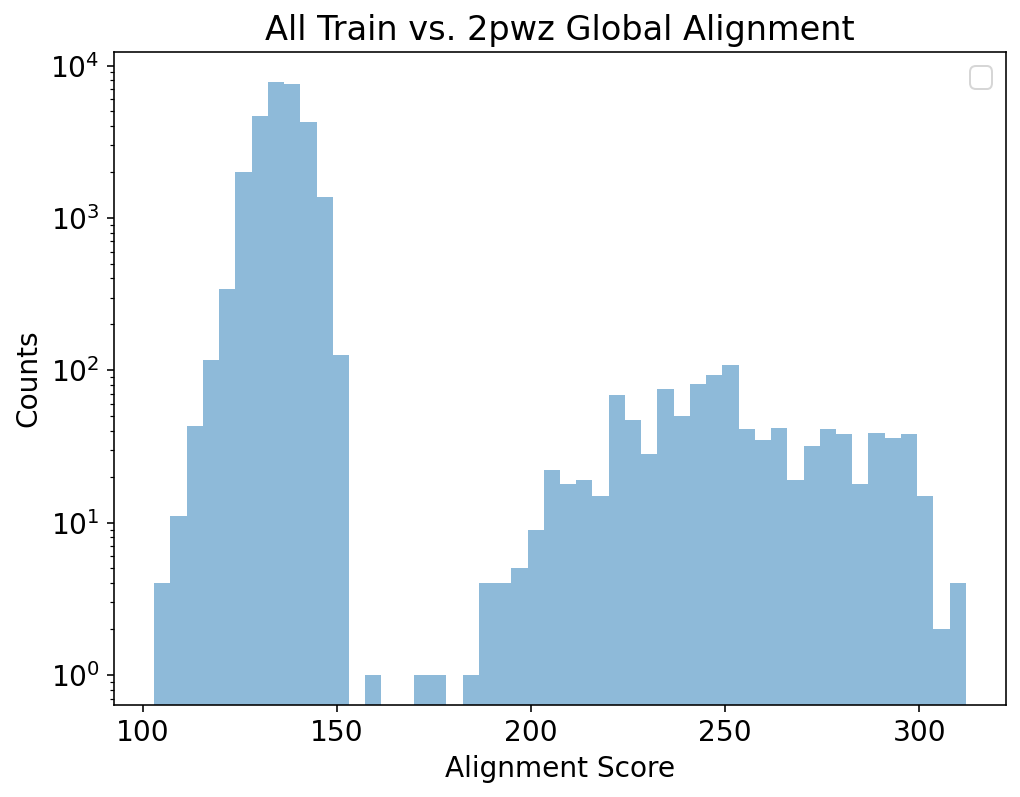

In [28]:
# plot a histogram showing the distributions of alignment scores 
plt.hist(all_train_2pwz_align_scores_matrix, bins=50, alpha=0.5, log=True)
plt.xlabel("Alignment Score")
plt.ylabel("Counts")
plt.title("All Train vs. 2pwz Global Alignment")
plt.legend()

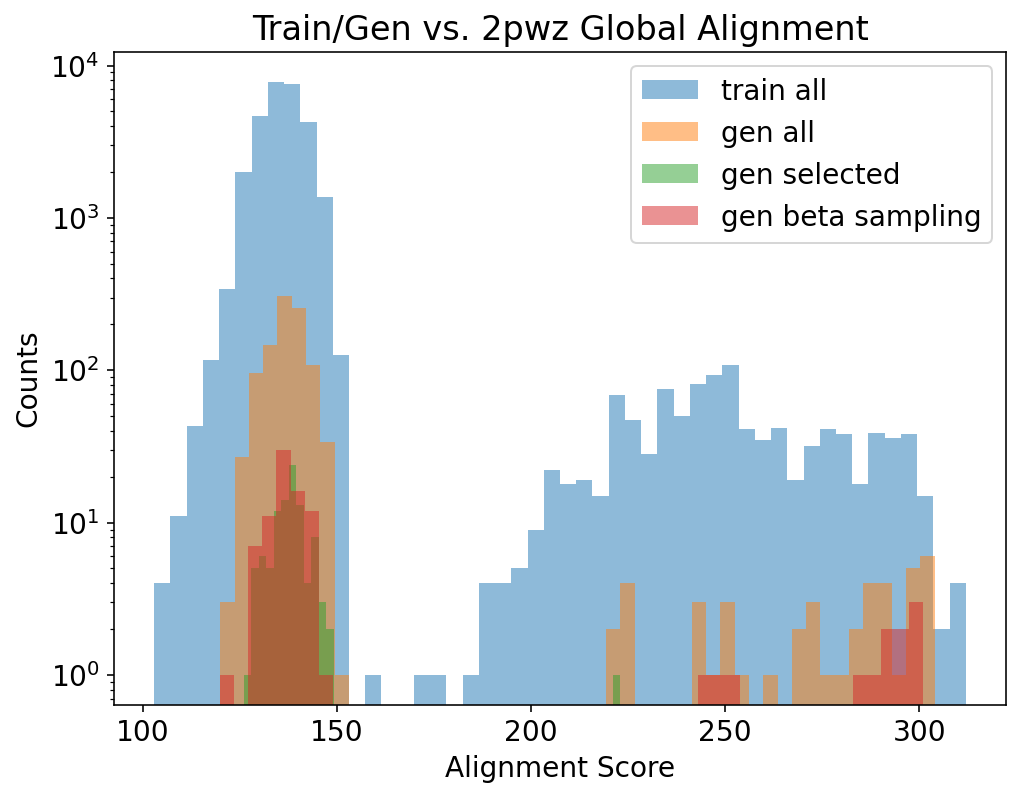

In [29]:
# plot the histogram distribution of beta sampled generated sequences, 
# selected generated sequences, all generated sequences, and all training sequences together

plt.hist(all_train_2pwz_align_scores_matrix, bins=50, alpha=0.5, log=True, label="train all")
plt.hist(all_gen_2pwz_align_scores_matrix, bins=50, alpha=0.5, log=True, label="gen all")
plt.hist(selected_gen_2pwz_align_scores_matrix, bins=50, alpha=0.5, log=True, label="gen selected")
plt.hist(beta_gen_2pwz_align_scores_matrix, bins=50, alpha=0.5, log=True, label="gen beta sampling")
plt.xlabel("Alignment Score")
plt.ylabel("Counts")
plt.title("Train/Gen vs. 2pwz Global Alignment")
plt.legend()


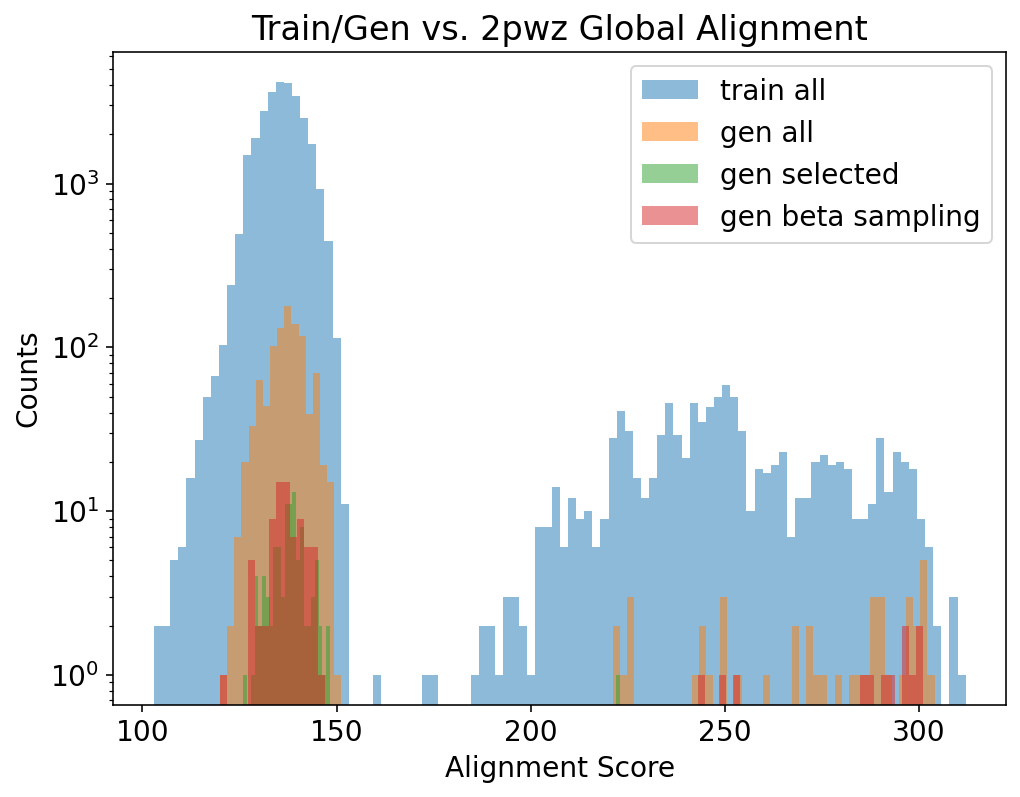

In [30]:
# increase bin number to bins=100
plt.hist(all_train_2pwz_align_scores_matrix, bins=100, alpha=0.5, log=True, label="train all")
plt.hist(all_gen_2pwz_align_scores_matrix, bins=100, alpha=0.5, log=True, label="gen all")
plt.hist(selected_gen_2pwz_align_scores_matrix, bins=100, alpha=0.5, log=True, label="gen selected")
plt.hist(beta_gen_2pwz_align_scores_matrix, bins=100, alpha=0.5, log=True, label="gen beta sampling")
plt.xlabel("Alignment Score")
plt.ylabel("Counts")
plt.title("Train/Gen vs. 2pwz Global Alignment")
plt.legend()


### Compute sequence similarity

In [31]:
ls /homes/abrace/src/SyntheticSequenceEvaluation/Examples

Dataset_Examples/
generate_example.ipynb
GMM-alpha-10-beta-16-seed-50-filtered.fasta
GMM-uniform-sample-filtered.fasta
likely-wood-287-seqs_needle_scores_against_2pwz.json
mdh-tree-generated-embed.tree
mdh-tree-generated-embed.xml
README.md
sampling-full-train.ipynb
sampling.ipynb
visualize_example.ipynb


In [32]:
json_path = Path("/homes/abrace/src/SyntheticSequenceEvaluation/Examples/likely-wood-287-seqs_needle_scores_against_2pwz.json")

                 0
count  1024.000000
mean    285.914062
std     238.603972
min      25.500000
25%     177.375000
50%     271.000000
75%     297.125000
max    1517.000000


Text(0.5, 1.0, 'Needle Score Generated Seqs')

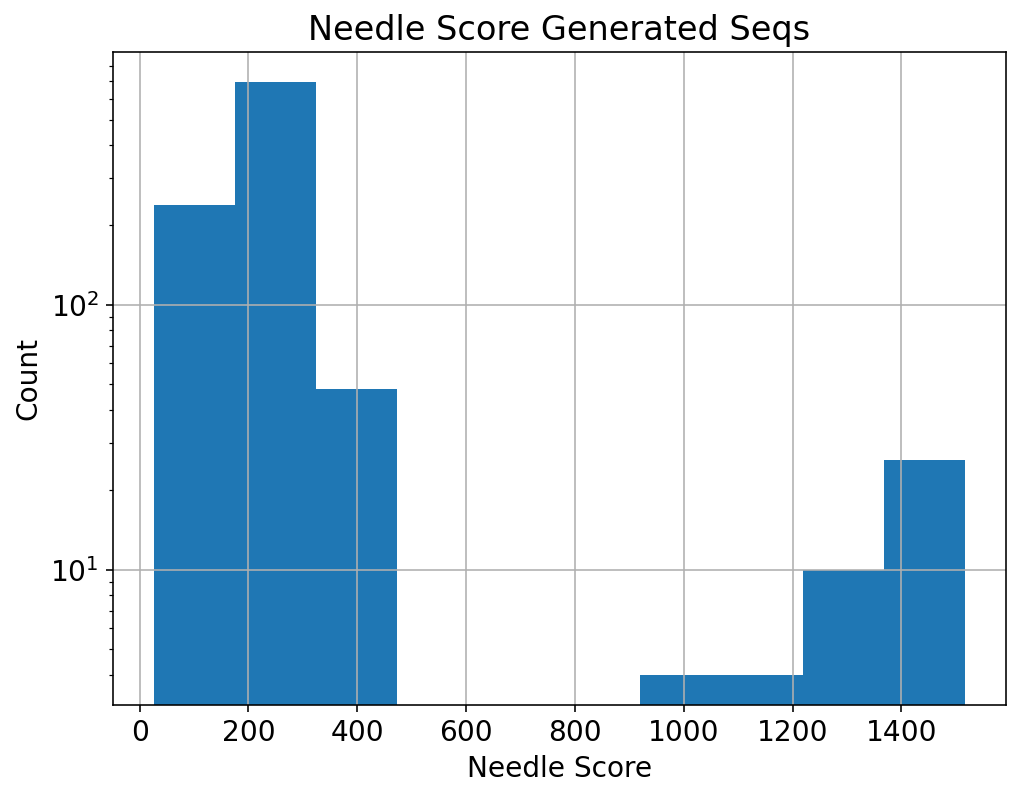

In [33]:
# similarity between selected generated seqs and 2pwz
import json
from biosynseq.metrics import get_seqs_from_fasta

def load_needle_score(gen_fasta_path: Path):

    with open(json_path) as f:
        data = json.load(f)
        
    # Need to sort these according to the order of the input fasta file
    similarity_map = {tup[1]: tup[2] for tup in data} # Map: sequence str -> similarity
    seqs = [str(record.seq) for record in get_seqs_from_fasta(gen_fasta_path)]
    sorted_similarity = [similarity_map[seq] for seq in seqs]
    return sorted_similarity    
    
needle_score = load_needle_score(gen_fasta_path) 
    
df = pd.DataFrame(needle_score)
print(df.describe())
df.hist(log=True)
plt.xlabel("Needle Score")
plt.ylabel("Count")
plt.title("Needle Score Generated Seqs")

                 0
count    98.000000
mean    247.188776
std     108.616879
min      32.500000
25%     170.875000
50%     267.500000
75%     296.250000
max    1083.000000


Text(0.5, 1.0, 'Needle Score Selected Generated Seqs')

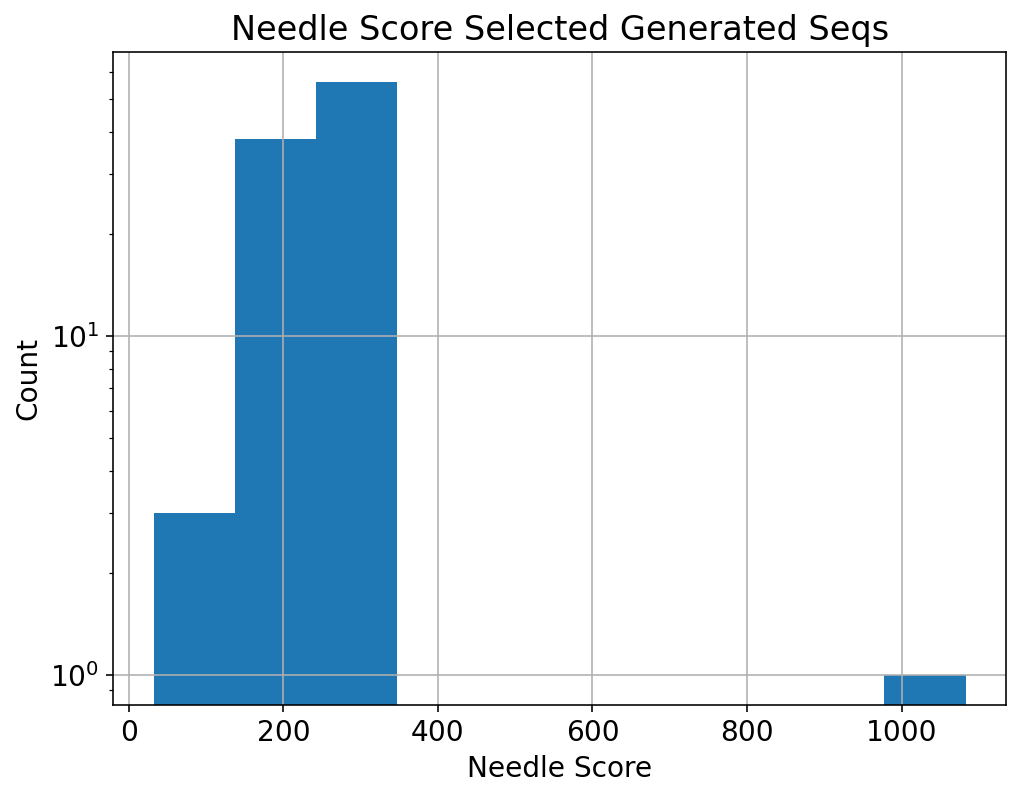

In [34]:
needle_score = load_needle_score(selected_gen_fasta_path) 
    
df = pd.DataFrame(needle_score)
print(df.describe())
df.hist(log=True)
plt.xlabel("Needle Score")
plt.ylabel("Count")
plt.title("Needle Score Selected Generated Seqs")

In [35]:
# To DO: get json files for train sequences to get sequence similarity of train sequences with 2pwz

In [36]:
# currently not able to run the sequence similarity for non-generated sequences due to 
# incorrect json file
needle_score = load_needle_score(selected_train_fasta_path) 
    
df = pd.DataFrame(needle_score)
print(df.describe())
df.hist(log=True)
plt.xlabel("Needle Score")
plt.ylabel("Count")
plt.title("Needle Score Train Seqs")

KeyError: 'ATGTCCAAGAAGCCCGTCCGCGTGGCTGTCACGGGTGCCGCCGGCCAGATCGGCTACGCGCTGCTGTTTCGCATTGCCTCCGGCGAGATGCTCGGCAAGGATCAGCCCGTCATCCTGCAGCTGCTGGAGATCCCCGACGAGAAGGCCCAGAAGGCCCTCAAGGGCGTGATGATGGAGCTTGAGGATTGCGCCTTCCCACTGCTGGCCGGGATGCAGGCCCACGGCGACCCGAACACCGCCTTTCGCGACGCCGACTATGCACTGCTCGTGGGTGCGCGCCCGCGCGGCCCGGGCATGGAGCGTGCCGACCTGCTGGCGGCCAACGCCCAGATCTTCACCGCCCAGGGCAAGGCCCTCGATGCGGCAGCCAGCCGCGACGTCAAGGTGCTCGTGGTGGGCAACCCGGCCAACACCAACGCCTGGATCGCGATGAAGAGCGCGCCCTCGCTGGCACGCGAGAACTTCACCGCGATGCTGCGCCTGGACCACAACCGTGCGCTGAGCCAGCTCGCCGCCAAGACCGGCAAGCCGGTGGCCAGCATCCGCAAGATGGCCGTGTGGGGCAACCACTCGCCCACGATGTACGCCGACTACCGCTTCGCGACCATCGAAGGCACATCGGTGAAGGACATGATCAACGACCACTCCTGGAACAAGGACGTGTTCCTGCCCACCGTGGGAAAGCGCGGCGCCGCCATCATCGAGGCCCGGGGCCTGTCCTCGGCCGCGTCCGCCGCCAACGCCGCCATCGACCACATGCGCGACTGGGCGCTGGGCACGAACGGTGAGTGGGTGACGATGGGCGTGCCGAGCAACGGCGAGTACGGCATCCCGCAGGACGTGATGTTCGGCTACCCCGTCACCTGCGAGGGCGGCAAGTACAAGATCATCGAAGGCCTGCCCATCGACGCCTTCAGCCAGGGCTGCATCGACAAGACGCTGGCCGAGCTGACGGGCGAGCAAGACGGCGTGAAGCACCTGATCTGA'

In [ ]:
test_fasta_path = Path("/homes/mzvyagin/mdh_gpt2/test_folder_concatenated.fasta")
needle_score = load_needle_score(test_fasta_path) 
    
df = pd.DataFrame(needle_score)
print(df.describe())
df.hist(log=True)
plt.xlabel("Needle Score")
plt.ylabel("Count")
plt.title("Needle Score Test Seqs")

In [ ]:
val_fasta_path = Path("/homes/mzvyagin/mdh_gpt2/val_folder_concatenated.fasta")
needle_score = load_needle_score(val_fasta_path) 
    
df = pd.DataFrame(needle_score)
print(df.describe())
df.hist(log=True)
plt.xlabel("Needle Score")
plt.ylabel("Count")
plt.title("Needle Score Val Seqs")

In [ ]:
gen_fasta_path = Path("/homes/mzvyagin/mdh_gpt2/likely-wood-857/likely-wood-857_1024concat_seqs.fasta")
needle_score = load_needle_score(gen_fasta_path) 
    
df = pd.DataFrame(needle_score)
print(df.describe())
df.hist(log=True)
plt.xlabel("Needle Score")
plt.ylabel("Count")
plt.title("Needle Score Gen Seqs")